## Chapter 3: Dynamic Programming

### What is Dynamic Programming?

**Dynamic programming (DP)** is a collection of algorithms that can be used to compute optimal **policies** given a perfect model such as a **Markov Decision Process (MDP).**

DP can solve problems that have two properties:

1. **Overlapping subproblems**
    * Problem can be broken down to subproblems 
    * Solution to subproblems can be reused
</br></br>
2. **Optimal substructure**
    * Problem can be decomposed into subproblems

For example, **Fibonacci numbers** computation is one of the problems that can be solved by dynamic programming.

<p align="center">

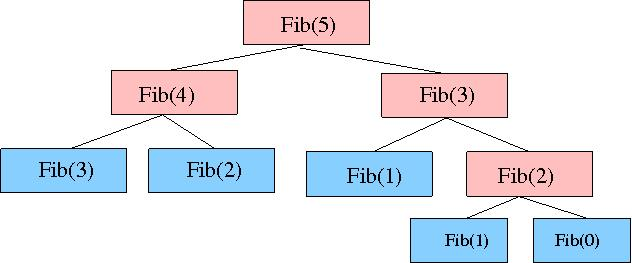
</p>

In RL, if we know full MDP, Bellman equations can be solved by Dynamic Programming. 

### Policy iteration

Policy iteration is a DP algorithm that finds optimal policy by iterative **policy evaluation** and **policy improvement**.
**Policy evaluation** estimates value of the policy $\pi$, and **policy improvement** generates policy $\pi'$ better than $\pi$ with estimated value $v_\pi$. With iterative procedure, value function $v$ and policy $\pi$ can reach its optimal $v_*$ and $\pi_*$.

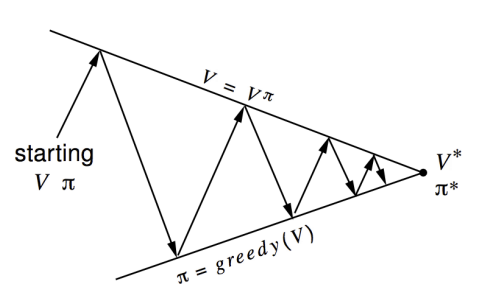

#### Policy evaluation
How can we find the value function in policy evaluation? We can find it by using **Bellman equation** mentioned in **Chapter 2**.
</br>
</br>
<font size="4">
$$\begin{align}
v_\pi(s) = \mathbb{E}_\pi[R_{t+1} + \gamma v_\pi(s_{t+1}) | S_t = s] &
\\= \sum_{a \in \mathcal{A}} \pi(a|s) (R_{t+1} + \gamma \sum_{s' \in \mathcal{S}}v_\pi(s_{t+1}))
\end{align}$$
</font>

At first, we set value function at iteration 0 under policy $\pi$ as $v_k(s)$ arbitarily (except the terminal state, which has to be set to zero) for all $s \in \mathcal{S}$. Then calculate the next approximation $v_{k+1}$ by using the Bellman equation.
</br>
</br>
<font size="4">
$$\begin{align}
v_{k+1}(s) = \sum_{a \in \mathcal{A}} \pi(a|s) (R_s^a + \gamma \sum_{s' \in \mathcal{S}}\mathcal{P}_{ss'}^a v_{k}(s'))
\end{align}$$
</font>
In MDP, $v_k$ converges to true $v_\pi$ as $k \rightarrow \infty$.


#### Policy improvement

After policy evaluation, policy $\pi$ can be improved easily by
</br>
</br>
<font size="4">
$$\begin{align}
\pi'(s) = \text{argmax}_{a \in \mathcal{A}} q_\pi (s,a) &
\\ = \text{argmax}_a \sum_{s', r}\mathcal{P}_{ss'}^a (r + \gamma v_\pi(s'))
\end{align}$$
</font>

As value function under policy $\pi$ is equal to $q_\pi (s, \pi(s)$, acting greedily improves the value from any state $s$ over one step.
</br>
</br>
<font size="4">
$$\begin{align}
q_\pi(s, \pi'(s)) = \max_{a \in \mathcal{A}} q_\pi(s, a) \geq q_\pi(s, \pi(s)) = v_\pi(s)
\end{align}$$
</font>
And therefore improves the value function, $v_{\pi'}(s) \geq v_\pi(s)$
</br>
</br>
<font size="4">
$$\begin{align}
v_\pi(s) \leq q_\pi(s, \pi'(s)) = \mathbb{E}_{\pi'}[R_{t+1} + \gamma v_\pi(S_{t+1}) | S_t = s] &
\\  \leq \mathbb{E}_{\pi'}[R_{t+1} + \gamma q_\pi(S_{t+1}, \pi'(S_{t+1}) | S_t = s]
\\  \leq \mathbb{E}_{\pi'}[R_{t+1} + \gamma R_{t+2} + \gamma^2 q_\pi(S_{t+2}, \pi'(S_{t+2})) | S_t = s]
\\  \leq \mathbb{E}_{\pi'}[R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + \cdots | S_t = s] = v_{\pi'}(s)
\end{align}$$
</font>

If improvement stops, or 
</br>
</br>
<font size="4">
$$\begin{align}
q_\pi(s, \pi'(s)) = \max_{a \in \mathcal{A}} q_\pi(s, a) = q_\pi(s, \pi(s)) = v_\pi(s)
\end{align}$$
</font>
Then $v_\pi(s) = v_*(s)$ for all $s \in \mathcal{S}$, satisfying Bellman optimality equation.


### Value iteration

However, policy iteration holds drawbacks such as large required computation power for policy evaluation, and its difficulty of converging to optimal value function in all states. Even more, optimal value function may not be required for achievement of optimal policy. Inspired from it, **Value iteration** combines policy evaluation and improvement by using the Bellman optimality equation. 
</br>
</br>
<font size="4">
$$\begin{align}
v_{*}(s) = \max_{a \in \mathcal{A}} (R_s^a + \gamma \sum_{s' \in \mathcal{S}}\mathcal{P}_{ss'}^a v_{*}(s'))
\end{align}$$
</font>

At each iteration, value function $v_*$ is updated by the forementioned equation until its change becomes minimal. Then the deterministic policy can be caculated by policy improvement. 


### Contraction Mapping Theorem

Both policy iteration and value iteration can calculate optimal value function in a MDP. But can we prove it always converge to $v_*$, and the converged $v_*$ is a unique solution? These questions are resolved by contraction mapping. 

Consider two different value functions *u* and *v*. Its $\infty$-norm can be calculated as the following equation.
</br>
</br>
<font size="4">
$$\begin{align}
||u-v|| = \max_{s \in \mathcal{S}}|u(s) - v(s)|
\end{align}$$
</font>

For policy iteration, the bellman expectation equation is used for policy evaluation. Under policy $\pi$, $\infty$-norm between two value functions is
</br>
</br>
<font size="4">
$$\begin{align}
||(\mathcal{R}^\pi +  \gamma \mathcal{P}^\pi u) - (\mathcal{R}^\pi +  \gamma \mathcal{P}^\pi v)||_\infty = ||\gamma \mathcal{P} (u - v) ||_\infty &
\\ \leq ||\gamma \mathcal{P} ||(u - v)||_\infty ||_\infty
\\ \leq ||(u - v)||_\infty
\end{align}$$
</font>

It proves policy evaluation makes value function converges to one unique point at a linear convergence rate of $\gamma$. Convergence of value iteration can be also proved by contraction mapping of Bellman optimality equation, too.

### Dynamic Programming and Full-Width Backups

Dynamic programming uses **full-width backups** - which means it considers every next state and action for each backup. 

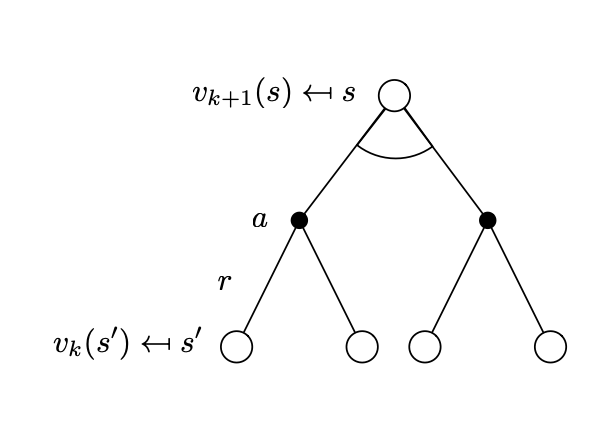

For *m* actions and *n* states, policy iteration and value iteration have complexity of $O(mn^2)$. Thus it may be efficient for mid-sized problems, but for large problems it can suffer from curse of dimensionality.

Therefore, algorithms that implement **sample backups** - which only considers sampled transitions $(\mathcal{S}, \mathcal{A}, \mathcal{R}, \mathcal{S'})$ is widely used. Compared to DP, it has many advantages:

 - Model-free: No full knowledge of MDP is required.
 - Backup cost does not depend on the state size *n* -> does not suffer from curse of dimensionality.
